<a href="https://colab.research.google.com/github/SharonOkolo/HDR-UK-Grp-7-Technical-Challenge/blob/Sharon's-analysis/Breast_Cancer_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
new_df=pd.read_csv("/content/new_df.csv")
patient= new_df

In [56]:
# Set the default seaborn color palette to Okabe-Ito
sns.set_palette("colorblind") # Okabe-Ito is part of the "colorblind" palette in seaborn

In [57]:

#url = 'https://stummuac-my.sharepoint.com/:x:/g/personal/23737576_stu_mmu_ac_uk/EWkEN_C6VmVGkpkkvf5GPoUBRNrjPy38894JhOArpalSew?e=K5FeW8'
#download_url = 'https://stummuac-my.sharepoint.com/personal/23737576_stu_mmu_ac_uk/_layouts/15/download.aspx?share=' + url.split('/')[-1].split('?')[0]
#patient = pd.read_csv(download_url)

In [58]:
patient.head()

,PATIENTID,GENDER,ETHNICITY,VITALSTATUS,CLINICAL_TRIAL,CHEMO_RADIATION,BENCHMARK_GROUP,DIAGNOSISDATEBEST,AGE,QUINTILE_2019,STAGE_BEST,SITE_ICD10_O2_3CHAR
0,10000001,1,A,A,NaN,NaN,NaN,2017-03-31,84,4,?,C44
1,10000002,1,NaN,A,NaN,NaN,NaN,2016-01-14,67,5 - least deprived,?,C44
2,10000003,2,A,A,NaN,NaN,NaN,2018-12-10,79,3,?,C44
3,10000004,1,A,A,NaN,NaN,NaN,2018-04-05,76,4,?,C44
4,10000005,1,A,A,NaN,NaN,NaN,2018-04-23,49,3,?,C44


In [59]:
patient_c50 = patient[patient['SITE_ICD10_O2_3CHAR'] == 'C50'].copy()
display(patient_c50.head())

,PATIENTID,GENDER,ETHNICITY,VITALSTATUS,CLINICAL_TRIAL,CHEMO_RADIATION,BENCHMARK_GROUP,DIAGNOSISDATEBEST,AGE,QUINTILE_2019,STAGE_BEST,SITE_ICD10_O2_3CHAR
298078,10273711,1,NaN,A,NaN,NaN,NaN,2019-03-19,82,4,?,C50
300379,10275818,1,A,D,02,N,CISPLATIN + PEMETREXED,2019-08-14,77,3,?,C50
300791,10276182,1,A,D,NaN,NaN,NaN,2019-11-12,46,4,2A,C50
302739,10277943,1,A,A,NaN,NaN,NaN,2018-02-04,80,2,1A,C50
304208,10279280,1,A,D,NaN,NaN,NaN,2017-04-12,60,1 - most deprived,4,C50


In [60]:
print(patient_c50['PATIENTID'].nunique())

181241


In [61]:
display(patient_c50.isnull().sum())

,0
PATIENTID,0
GENDER,0
ETHNICITY,3854
VITALSTATUS,0
CLINICAL_TRIAL,132940
CHEMO_RADIATION,167310
BENCHMARK_GROUP,126264
DIAGNOSISDATEBEST,0
AGE,0
QUINTILE_2019,0


In [62]:
duplicate_patients = patient_c50[patient_c50.duplicated('PATIENTID', keep=False)]
print("Duplicate Patient IDs:")
display(duplicate_patients)

Duplicate Patient IDs:


,PATIENTID,GENDER,ETHNICITY,VITALSTATUS,CLINICAL_TRIAL,CHEMO_RADIATION,BENCHMARK_GROUP,DIAGNOSISDATEBEST,AGE,QUINTILE_2019,STAGE_BEST,SITE_ICD10_O2_3CHAR
308003,10282626,2,A,A,NaN,NaN,CISPLATIN + GEMCITABINE,2018-01-06,81,3,2B,C50
308006,10282626,2,A,A,02,Y,IXAZOMIB + LENALIDOMIDE,2018-01-06,81,3,2B,C50
308009,10282626,2,A,A,02,N,CARBOPLATIN + PEMETREXED,2018-01-06,81,3,2B,C50
308012,10282626,2,A,A,02,N,CYCLOPHOSPHAMIDE + DOXORUBICIN + RITUXIMAB + V...,2018-01-06,81,3,2B,C50
311476,10285735,2,A,D,02,NaN,LUTETIUM-177,2019-10-01,74,5 - least deprived,2A,C50
...,...,...,...,...,...,...,...,...,...,...,...,...
2501281,250002344,2,A,A,NaN,NaN,CARBOPLATIN + GEMCITABINE,2017-07-31,51,5 - least deprived,1,C50
2501283,250002344,2,A,A,N,Y,CARBOPLATIN + FLUOROURACIL,2017-07-31,51,5 - least deprived,1,C50
2501285,250002344,2,A,A,02,N,GEMCITABINE,2017-07-31,51,5 - least deprived,1,C50
2501287,250002344,2,A,A,02,N,FLUOROURACIL,2017-07-31,51,5 - least deprived,1,C50


In [63]:
print(patient_c50['GENDER'].unique())

[1 2]


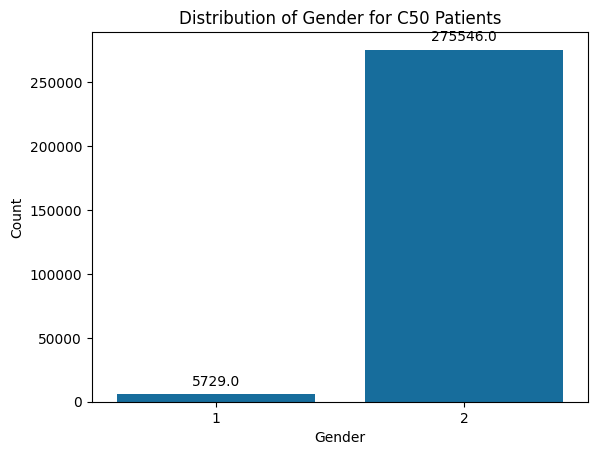

In [64]:
# Create a countplot of the GENDER column
ax = sns.countplot(x='GENDER', data=patient_c50)
plt.title('Distribution of Gender for C50 Patients')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', size=10)

plt.show()

In [65]:
print(patient_c50['ETHNICITY'].unique())

[nan 'A' 'S' 'B' 'X' 'L' 'C' 'Z' 'G' 'H' 'P' '0' 'J' 'M' 'N' 'R' 'F' 'D'
 'K' 'E']


In [66]:
ethnicity_mapping = {
    '0': 'White',
    '8': 'Other',
    'A': 'White British',
    'B': 'White Irish',
    'C': 'Any other White background',
    'CA': 'English',
    'CH': 'Turkish',
    'CP': 'Polish',
    'D': 'White and Black Caribbean',
    'E': 'White and Black African',
    'F': 'White and Asian',
    'G': 'Any other mixed background',
    'H': 'Asian Indian',
    'J': 'Asian Pakistani',
    'K': 'Asian Bangladeshi',
    'L': 'Any other Asian background',
    'M': 'Black Caribbean',
    'N': 'Black African',
    'P': 'Any other Black background',
    'R': 'Chinese',
    'S': 'Any other ethnic group',
    'X': 'Not known',
    'Z': 'Not stated'
}

patient_c50['ETHNICITY_DESC'] = patient_c50['ETHNICITY'].map(ethnicity_mapping)

display(patient_c50['ETHNICITY_DESC'].value_counts())

,count
ETHNICITY_DESC,
White British,228527
Not stated,11820
Any other White background,11294
Any other ethnic group,4497
Asian Indian,4250
Black Caribbean,2489
Any other Asian background,2264
Asian Pakistani,2223
Black African,1968


In [67]:
def group_ethnicity(ethnicity):
    if pd.isna(ethnicity):
        return 'Unknown'
    elif 'White' in ethnicity:
        return 'White'
    elif 'Black' in ethnicity:
        return 'Black'
    elif 'Asian' in ethnicity:
        return 'Asian'
    elif 'mixed' in ethnicity:
        return 'Mixed'
    elif ethnicity in ['Not known', 'Not stated', 'Any other ethnic group']:
        return 'Unknown'
    else:
        return 'Other'

patient_c50.loc[:, 'ETHNICITY_GROUP'] = patient_c50['ETHNICITY_DESC'].apply(group_ethnicity)

display(patient_c50['ETHNICITY_GROUP'].value_counts())

,count
ETHNICITY_GROUP,
White,242676
Unknown,21823
Asian,9396
Black,5598
Other,947
Mixed,835


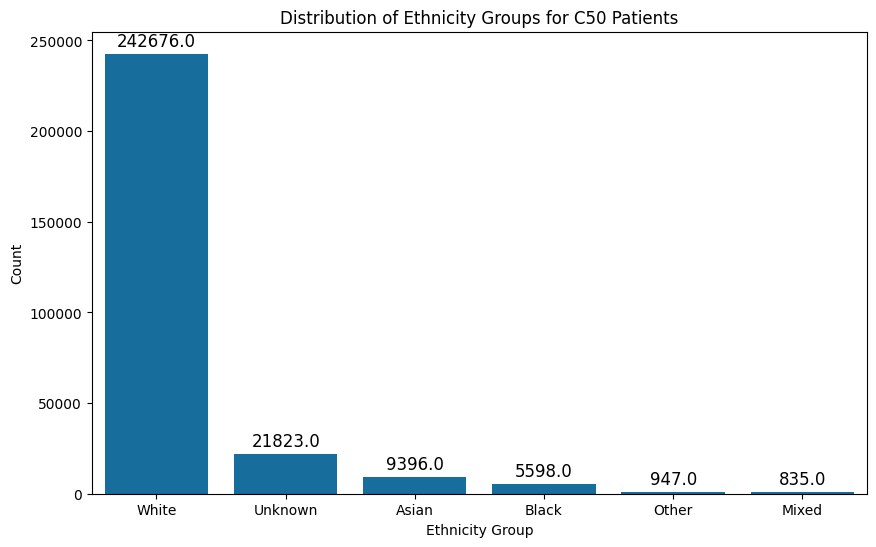

In [68]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='ETHNICITY_GROUP', data=patient_c50, order = patient_c50['ETHNICITY_GROUP'].value_counts().index)
plt.title('Distribution of Ethnicity Groups for C50 Patients')
plt.xlabel('Ethnicity Group')
plt.ylabel('Count')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', size=12)

plt.show()

In [69]:
print(patient_c50['CLINICAL_TRIAL'].unique())

[nan '02' '99' 'N' '2' '01' 'Y' '1' 'n' 'y']


In [70]:
def map_clinical_trial(value):
    if pd.isna(value):
        return 'Unknown'
    value = str(value).lower()
    if value in ['01', 'y', '1', 'yes']:
        return 'In trial'
    elif value in ['02', 'n', '2', 'no']:
        return 'Not in trial'
    elif value == '99':
        return 'Unknown'
    else:
        return 'Unknown'

patient_c50.loc[:, 'CLINICAL_TRIAL_DESC'] = patient_c50['CLINICAL_TRIAL'].apply(map_clinical_trial)

# Display the value counts of the new column
display(patient_c50['CLINICAL_TRIAL_DESC'].value_counts())

,count
CLINICAL_TRIAL_DESC,
Not in trial,141110
Unknown,135517
In trial,4648


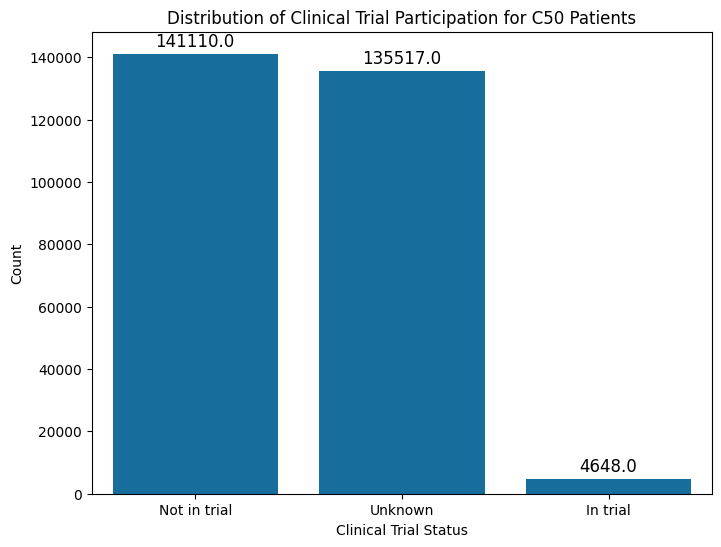

In [71]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='CLINICAL_TRIAL_DESC', data=patient_c50, order = patient_c50['CLINICAL_TRIAL_DESC'].value_counts().index)
plt.title('Distribution of Clinical Trial Participation for C50 Patients')
plt.xlabel('Clinical Trial Status')
plt.ylabel('Count')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', size=12)

plt.show()

In [72]:
print(patient_c50['CHEMO_RADIATION'].unique())

[nan 'N' 'Y' 'n' '2' '0']


In [73]:
def map_chemo_radiation(value):
    if pd.isna(value):
        return 'Unknown'
    value = str(value).lower()
    if value in ['y', 'yes', '1']:
        return 'Yes'
    elif value in ['n', 'no', '0', '2']:
        return 'No'
    else:
        return 'Unknown'

patient_c50.loc[:, 'CHEMO_RADIATION_DESC'] = patient_c50['CHEMO_RADIATION'].apply(map_chemo_radiation)

display(patient_c50['CHEMO_RADIATION_DESC'].value_counts())

,count
CHEMO_RADIATION_DESC,
Unknown,167310
No,112161
Yes,1804


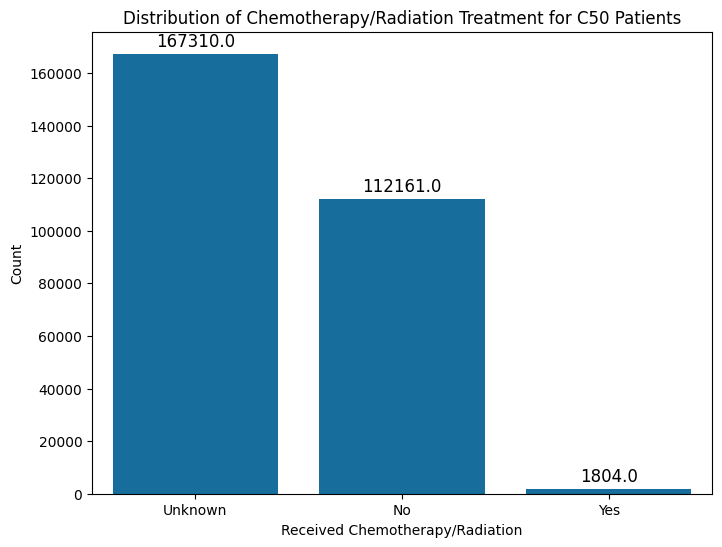

In [74]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='CHEMO_RADIATION_DESC', data=patient_c50, order = patient_c50['CHEMO_RADIATION_DESC'].value_counts().index)
plt.title('Distribution of Chemotherapy/Radiation Treatment for C50 Patients')
plt.xlabel('Received Chemotherapy/Radiation')
plt.ylabel('Count')


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', size=12)

plt.show()

,AGE
count,281275.00000
mean,63.56918
std,14.69133
min,0.00000
25%,52.00000
50%,64.00000
75%,74.00000
max,106.00000


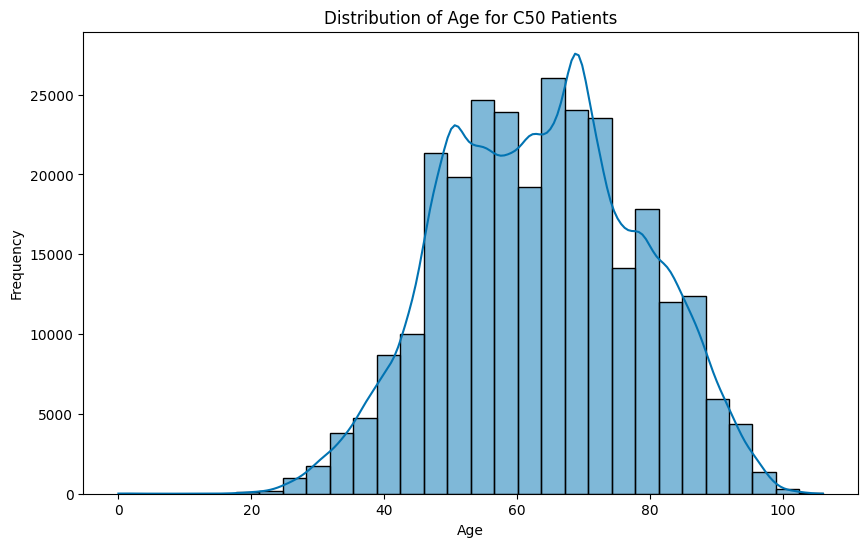

In [75]:
# Get descriptive statistics for the AGE column
display(patient_c50['AGE'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(patient_c50['AGE'], bins=30, kde=True)
plt.title('Distribution of Age for C50 Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

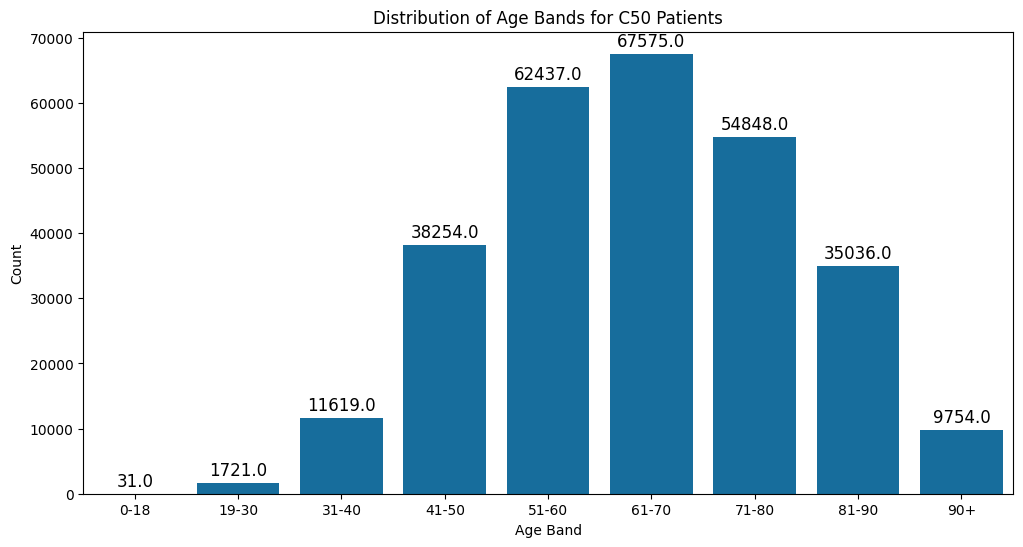

In [76]:
# Create age bands
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 110]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '90+']
patient_c50.loc[:, 'AGE_BAND'] = pd.cut(patient_c50['AGE'], bins=bins, labels=labels, right=False)

# Plot the distribution of age bands
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='AGE_BAND', data=patient_c50, order=labels)
plt.title('Distribution of Age Bands for C50 Patients')
plt.xlabel('Age Band')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', size=12)

plt.show()

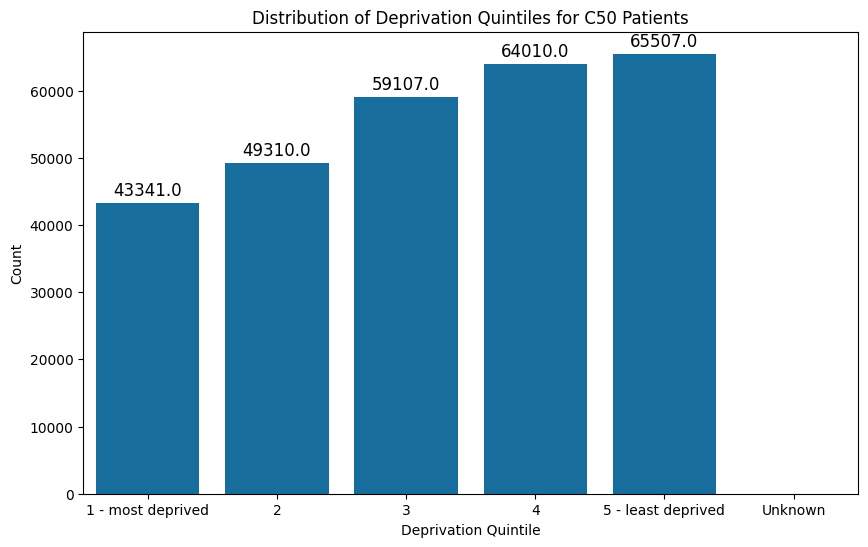

In [77]:
# Clean and map the QUINTILE_2019 column
def map_quintile(value):
    if pd.isna(value):
        return 'Unknown'
    value = str(value)
    if '1' in value:
        return '1 - most deprived'
    elif '2' in value:
        return '2'
    elif '3' in value:
        return '3'
    elif '4' in value:
        return '4'
    elif '5' in value:
        return '5 - least deprived'
    else:
        return 'Unknown'

patient_c50.loc[:, 'QUINTILE_DESC'] = patient_c50['QUINTILE_2019'].apply(map_quintile)

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='QUINTILE_DESC', data=patient_c50, order=['1 - most deprived', '2', '3', '4', '5 - least deprived', 'Unknown'])
plt.title('Distribution of Deprivation Quintiles for C50 Patients')
plt.xlabel('Deprivation Quintile')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', size=12)

plt.show()

Contingency Table:


CLINICAL_TRIAL_DESC,In trial,Not in trial,Unknown
QUINTILE_DESC,,,
1 - most deprived,725,21797,20819
2,774,24507,24029
3,1065,29791,28251
4,1086,32267,30657
5 - least deprived,998,32748,31761



Chi-squared statistic: 29.005958477885084
P-value: 0.00031633552368119595


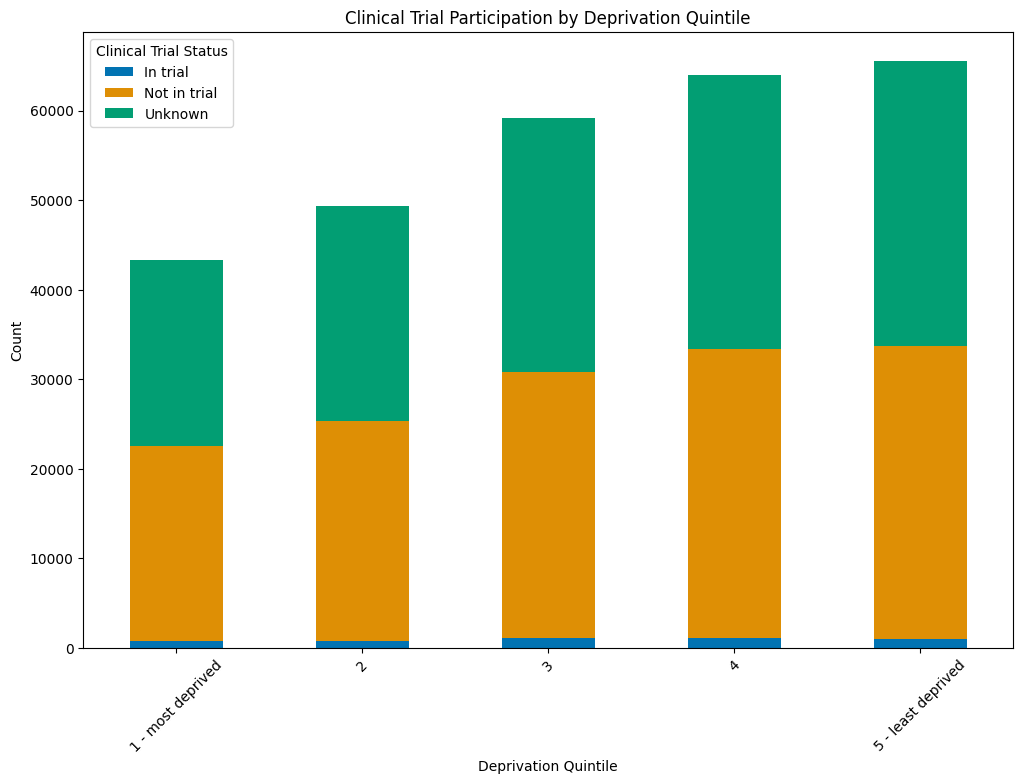

In [78]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(patient_c50['QUINTILE_DESC'], patient_c50['CLINICAL_TRIAL_DESC'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
display(contingency_table)
print(f"\nChi-squared statistic: {chi2}")
print(f"P-value: {p}")

# Visualize the relationship
contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Clinical Trial Participation by Deprivation Quintile')
plt.xlabel('Deprivation Quintile')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Clinical Trial Status')
plt.show()

In [79]:
contingency_table['Total'] = contingency_table.sum(axis=1)
display(contingency_table)

CLINICAL_TRIAL_DESC,In trial,Not in trial,Unknown,Total
QUINTILE_DESC,,,,
1 - most deprived,725,21797,20819,43341
2,774,24507,24029,49310
3,1065,29791,28251,59107
4,1086,32267,30657,64010
5 - least deprived,998,32748,31761,65507


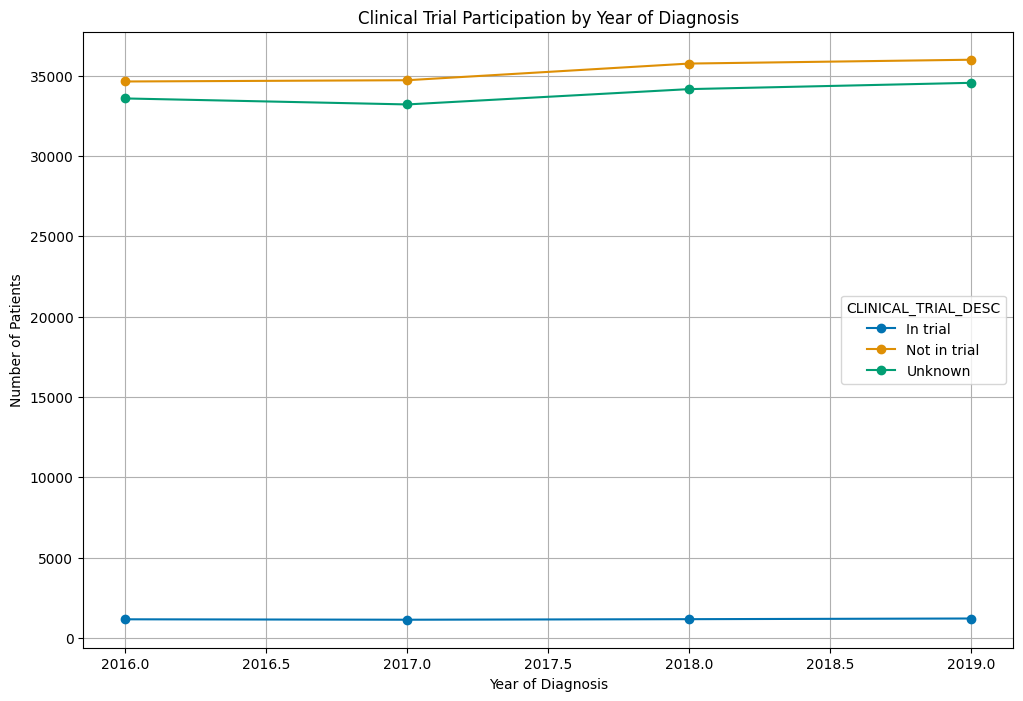

In [80]:
# Convert 'DIAGNOSISDATEBEST' to datetime
patient_c50['DIAGNOSISDATEBEST'] = pd.to_datetime(patient_c50['DIAGNOSISDATEBEST'])

# Extract the year from the diagnosis date
patient_c50['DIAGNOSIS_YEAR'] = patient_c50['DIAGNOSISDATEBEST'].dt.year

# Group by year and clinical trial status and count the number of patients
trial_by_year = patient_c50.groupby(['DIAGNOSIS_YEAR', 'CLINICAL_TRIAL_DESC']).size().unstack(fill_value=0)

# Plot the trend
trial_by_year.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Clinical Trial Participation by Year of Diagnosis')
plt.xlabel('Year of Diagnosis')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.show()

In [81]:
trial_by_year['Total'] = trial_by_year.sum(axis=1)
display(trial_by_year)

CLINICAL_TRIAL_DESC,In trial,Not in trial,Unknown,Total
DIAGNOSIS_YEAR,,,,
2016,1154,34640,33584,69378
2017,1128,34719,33211,69058
2018,1162,35756,34165,71083
2019,1204,35995,34557,71756


Contingency Table:


GENDER,1,2
DIAGNOSIS_YEAR,,
2016,1050,68328
2017,1392,67666
2018,1479,69604
2019,1808,69948



Chi-squared statistic: 179.91910726792133
P-value: 9.181951413609245e-39


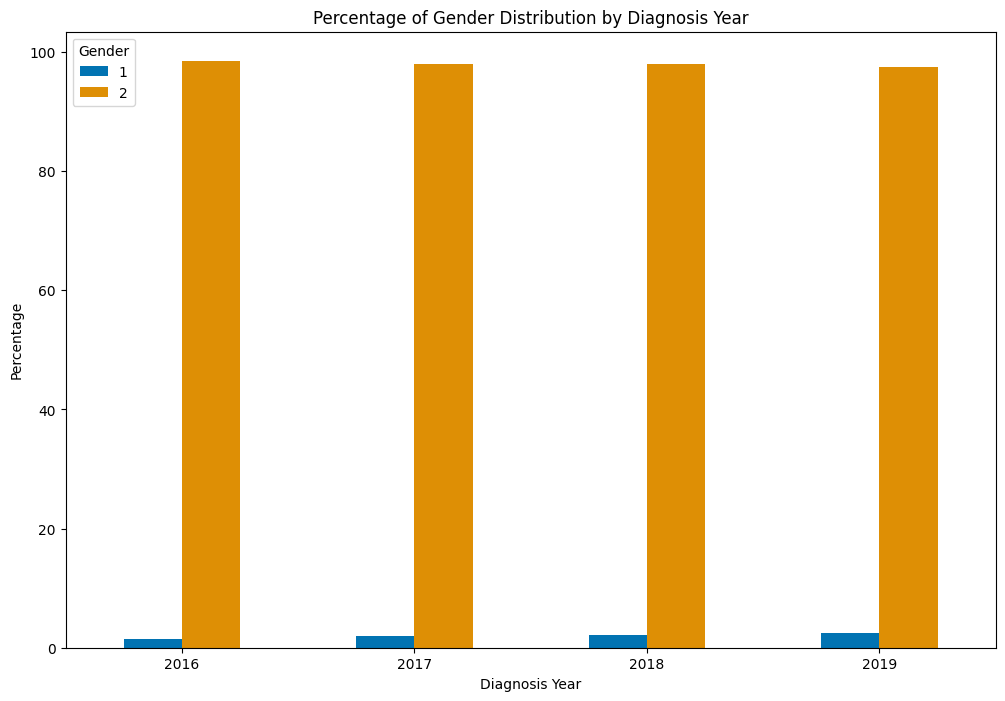

In [82]:
from scipy.stats import chi2_contingency

# Extract the year from the diagnosis date
patient_c50.loc[:, 'DIAGNOSIS_YEAR'] = pd.to_datetime(patient_c50['DIAGNOSISDATEBEST']).dt.year

# Create a contingency table
contingency_table = pd.crosstab(patient_c50['DIAGNOSIS_YEAR'], patient_c50['GENDER'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
display(contingency_table)
print(f"\nChi-squared statistic: {chi2}")
print(f"P-value: {p}")

# Calculate percentages
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Visualize the relationship as a grouped bar plot showing percentages
contingency_table_percentage.plot(kind='bar', figsize=(12, 8))
plt.title('Percentage of Gender Distribution by Diagnosis Year')
plt.xlabel('Diagnosis Year')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

Contingency Table:


QUINTILE_DESC,1 - most deprived,2,3,4,5 - least deprived
ETHNICITY_GROUP,,,,,
Asian,2202,2079,1733,1709,1673
Black,1895,1345,939,790,629
Mixed,170,157,140,166,202
Other,185,262,208,119,173
Unknown,3260,3574,4613,4771,5605
White,35629,41893,51474,56455,57225



Chi-squared statistic: 3053.9867387938575
P-value: 0.0


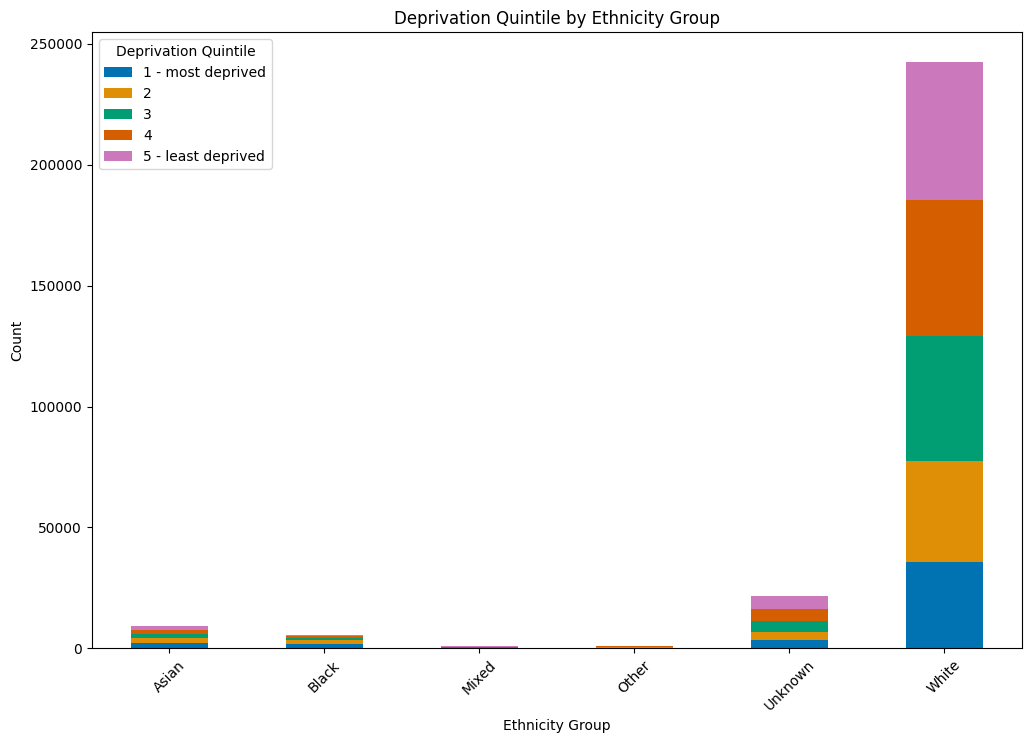

In [83]:
from scipy.stats import chi2_contingency

ethnicity_mapping = {
    '0': 'White',
    '8': 'Other',
    'A': 'White British',
    'B': 'White Irish',
    'C': 'Any other White background',
    'CA': 'English',
    'CH': 'Turkish',
    'CP': 'Polish',
    'D': 'White and Black Caribbean',
    'E': 'White and Black African',
    'F': 'White and Asian',
    'G': 'Any other mixed background',
    'H': 'Asian Indian',
    'J': 'Asian Pakistani',
    'K': 'Asian Bangladeshi',
    'L': 'Any other Asian background',
    'M': 'Black Caribbean',
    'N': 'Black African',
    'P': 'Any other Black background',
    'R': 'Chinese',
    'S': 'Any other ethnic group',
    'X': 'Not known',
    'Z': 'Not stated'
}

patient_c50['ETHNICITY_DESC'] = patient_c50['ETHNICITY'].map(ethnicity_mapping)

def group_ethnicity(ethnicity):
    if pd.isna(ethnicity):
        return 'Unknown'
    elif 'White' in ethnicity:
        return 'White'
    elif 'Black' in ethnicity:
        return 'Black'
    elif 'Asian' in ethnicity:
        return 'Asian'
    elif 'mixed' in ethnicity:
        return 'Mixed'
    elif ethnicity in ['Not known', 'Not stated', 'Any other ethnic group']:
        return 'Unknown'
    else:
        return 'Other'

patient_c50.loc[:, 'ETHNICITY_GROUP'] = patient_c50['ETHNICITY_DESC'].apply(group_ethnicity)


def map_quintile(value):
    if pd.isna(value):
        return 'Unknown'
    value = str(value)
    if '1' in value:
        return '1 - most deprived'
    elif '2' in value:
        return '2'
    elif '3' in value:
        return '3'
    elif '4' in value:
        return '4'
    elif '5' in value:
        return '5 - least deprived'
    else:
        return 'Unknown'

patient_c50.loc[:, 'QUINTILE_DESC'] = patient_c50['QUINTILE_2019'].apply(map_quintile)

# Create a contingency table
contingency_table_eth_dep = pd.crosstab(patient_c50['ETHNICITY_GROUP'], patient_c50['QUINTILE_DESC'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table_eth_dep)

print("Contingency Table:")
display(contingency_table_eth_dep)
print(f"\nChi-squared statistic: {chi2}")
print(f"P-value: {p}")

# Visualize the relationship
contingency_table_eth_dep.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Deprivation Quintile by Ethnicity Group')
plt.xlabel('Ethnicity Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Deprivation Quintile')
plt.show()

In [84]:
contingency_table_eth_dep['Total'] = contingency_table_eth_dep.sum(axis=1)
display(contingency_table_eth_dep)

QUINTILE_DESC,1 - most deprived,2,3,4,5 - least deprived,Total
ETHNICITY_GROUP,,,,,,
Asian,2202,2079,1733,1709,1673,9396
Black,1895,1345,939,790,629,5598
Mixed,170,157,140,166,202,835
Other,185,262,208,119,173,947
Unknown,3260,3574,4613,4771,5605,21823
White,35629,41893,51474,56455,57225,242676


Contingency Table (Diagnosis Year vs Gender):


GENDER,1,2
DIAGNOSIS_YEAR,,
2016,1050,68328
2017,1392,67666
2018,1479,69604
2019,1808,69948



Chi-squared statistic: 179.91910726792133
P-value: 9.181951413609245e-39


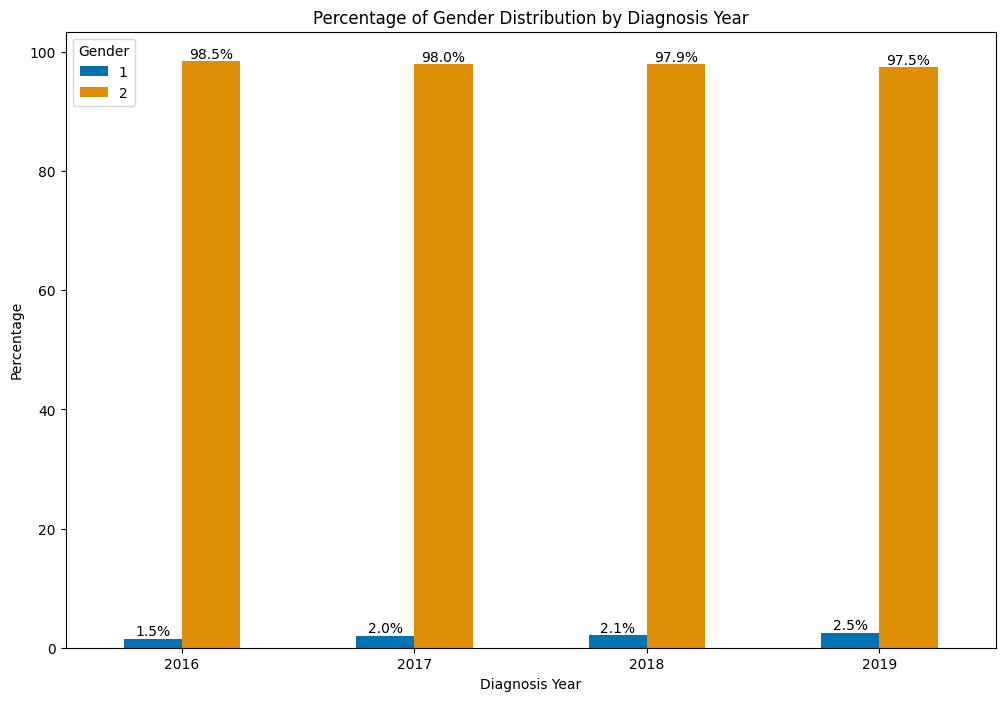

In [85]:
from scipy.stats import chi2_contingency

# Ensure 'DIAGNOSISDATEBEST' is in datetime format and extract the year
patient_c50.loc[:, 'DIAGNOSIS_YEAR'] = pd.to_datetime(patient_c50['DIAGNOSISDATEBEST']).dt.year

# Create a contingency table between DIAGNOSIS_YEAR and GENDER
contingency_table_gender_year = pd.crosstab(patient_c50['DIAGNOSIS_YEAR'], patient_c50['GENDER'])

# Perform the chi-squared test
chi2_gender_year, p_gender_year, dof_gender_year, expected_gender_year = chi2_contingency(contingency_table_gender_year)

print("Contingency Table (Diagnosis Year vs Gender):")
display(contingency_table_gender_year)
print(f"\nChi-squared statistic: {chi2_gender_year}")
print(f"P-value: {p_gender_year}")

# Calculate percentages
contingency_table_percentage = contingency_table_gender_year.div(contingency_table_gender_year.sum(axis=1), axis=0) * 100

# Visualize the relationship as a grouped bar plot showing percentages
ax = contingency_table_percentage.plot(kind='bar', figsize=(12, 8))
plt.title('Percentage of Gender Distribution by Diagnosis Year')
plt.xlabel('Diagnosis Year')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Gender')

# Add percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

plt.show()

Analysis of the C50 patient dataset revealed a statistically significant association between patient gender and the year of diagnosis ($\chi^2$=179.92, p < 0.001). The distribution of genders diagnosed with C50 was not uniform across the years 2016-2019. While Gender 2 patients consistently represented the vast majority of diagnoses each year, there was a notable, statistically significant increase in the percentage of Gender 1 patients diagnosed over this period. This finding suggests that gender and diagnosis year are not independent within this patient cohort. Further investigation is warranted to understand the underlying factors contributing to this trend, which could include changes in diagnostic practices, screening rates, or demographic shifts within the patient population over time.

In [86]:
def standardize_stage(stage):
    if pd.isna(stage) or stage in ['?', 'U']:
        return 'Unknown'
    stage_str = str(stage)
    if stage_str.startswith('1'):
        return '1'
    elif stage_str.startswith('2'):
        return '2'
    elif stage_str.startswith('3'):
        return '3'
    elif stage_str.startswith('4'):
        return '4'
    else:
        return 'Unknown' # Catch any other unexpected values

patient_c50.loc[:, 'STAGE_STANDARDIZED'] = patient_c50['STAGE_BEST'].apply(standardize_stage)

print("Value counts for Standardized STAGE_BEST column:")
display(patient_c50['STAGE_STANDARDIZED'].value_counts())

Value counts for Standardized STAGE_BEST column:


,count
STAGE_STANDARDIZED,
1,110023
2,102788
Unknown,30840
3,23513
4,14111


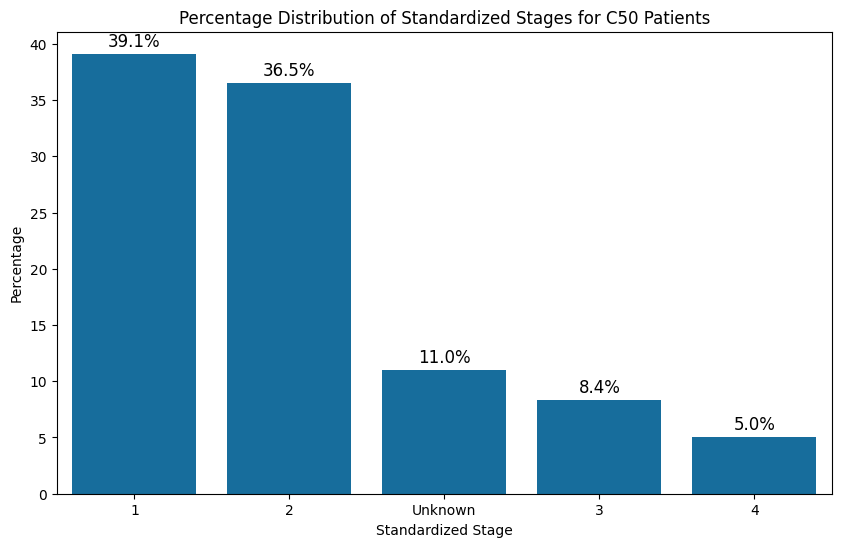

In [87]:
# Calculate percentages for standardized stages
stage_percentages = patient_c50['STAGE_STANDARDIZED'].value_counts(normalize=True).mul(100).reset_index()
stage_percentages.columns = ['STAGE_STANDARDIZED', 'Percentage']
stage_percentages = stage_percentages.sort_values(by='Percentage', ascending=False)

# Plot the distribution of standardized stages as percentages
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='STAGE_STANDARDIZED', y='Percentage', data=stage_percentages)
plt.title('Percentage Distribution of Standardized Stages for C50 Patients')
plt.xlabel('Standardized Stage')
plt.ylabel('Percentage')

# Add annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', size=12)

plt.show()

Contingency Table (Standardized Stage vs Age Band):


AGE_BAND,0-18,19-30,31-40,41-50,51-60,61-70,71-80,81-90,90+
STAGE_STANDARDIZED,,,,,,,,,
1,17,729,4721,15737,25907,27851,21076,11422,2563
2,4,527,4233,14336,23514,24574,20107,12160,3333
3,1,135,880,3105,4850,5649,4567,3341,985
4,1,83,635,1276,2131,2526,3043,3184,1232
Unknown,8,247,1150,3800,6035,6975,6055,4929,1641



Chi-squared statistic: 5134.53279643262
P-value: 0.0


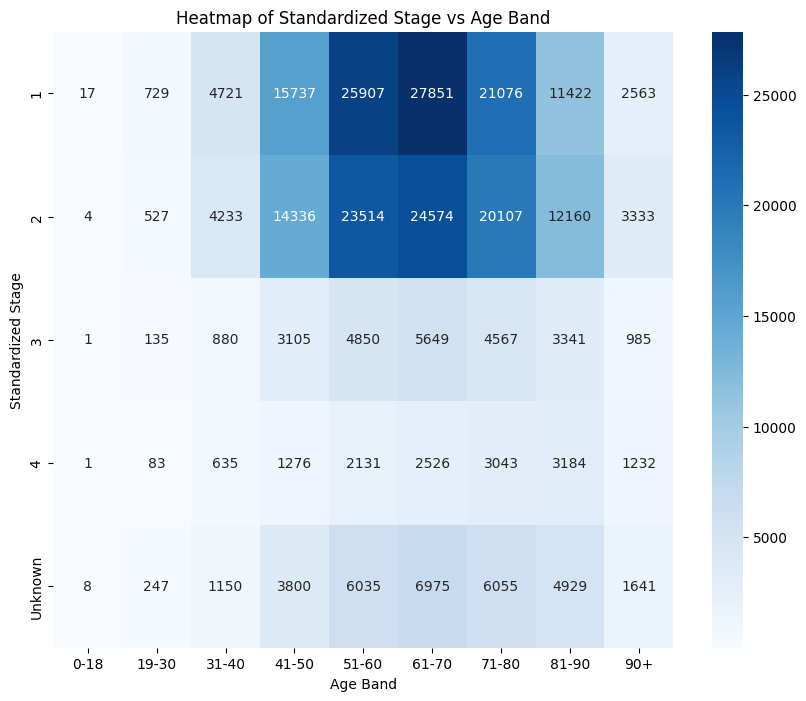

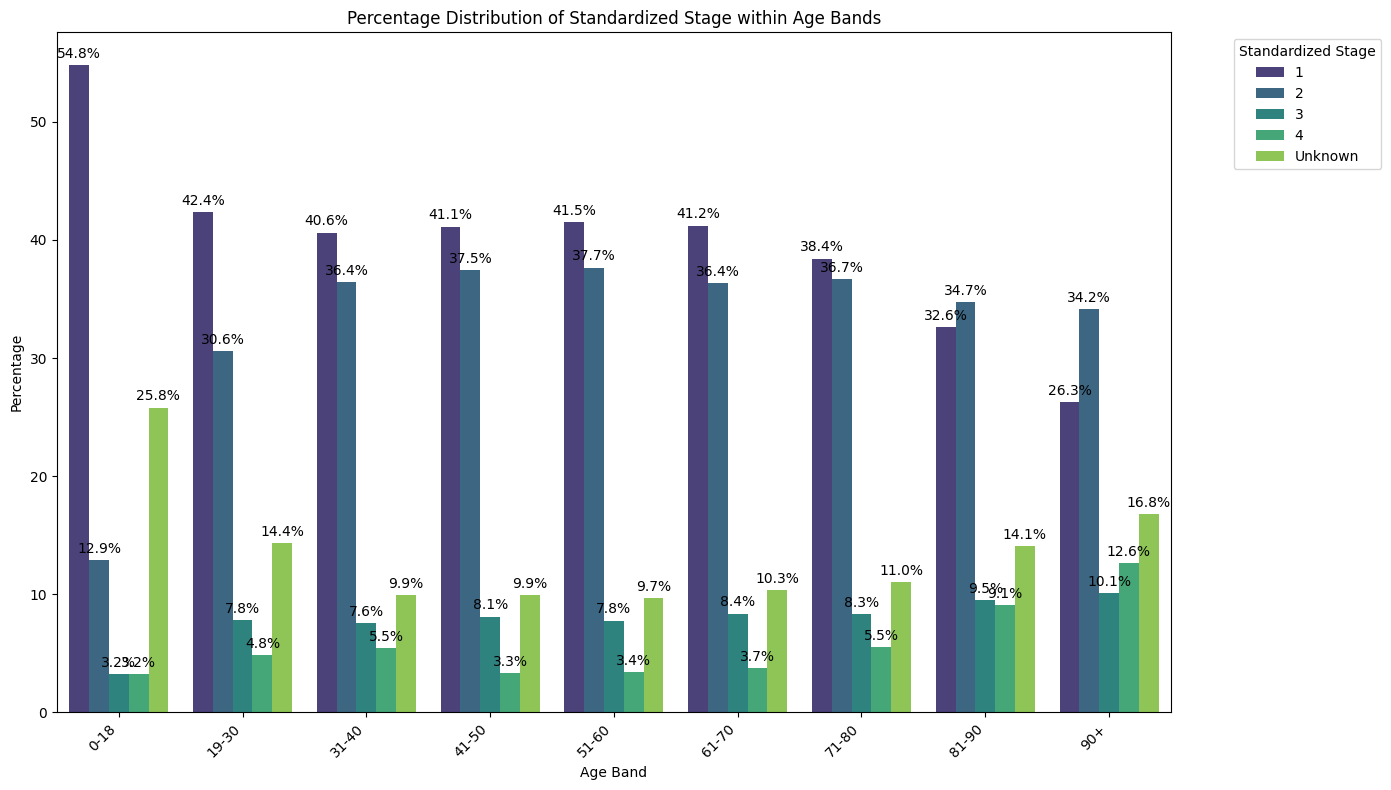

In [88]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a contingency table between STAGE_STANDARDIZED and AGE_BAND
contingency_table_stage_age = pd.crosstab(patient_c50['STAGE_STANDARDIZED'], patient_c50['AGE_BAND'])

# Perform the chi-squared test
chi2_stage_age, p_stage_age, dof_stage_age, expected_stage_age = chi2_contingency(contingency_table_stage_age)

print("Contingency Table (Standardized Stage vs Age Band):")
display(contingency_table_stage_age)
print(f"\nChi-squared statistic: {chi2_stage_age}")
print(f"P-value: {p_stage_age}")

# --- Heatmap Visualization ---
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table_stage_age, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Standardized Stage vs Age Band')
plt.xlabel('Age Band')
plt.ylabel('Standardized Stage')
plt.show()

# --- Grouped Bar Plot (Percentages) Visualization ---
# Calculate percentages within each age band
contingency_table_percentage = contingency_table_stage_age.div(contingency_table_stage_age.sum(axis=0), axis=1) * 100

# Prepare data for seaborn barplot
df_percentage = contingency_table_percentage.T.reset_index()
df_percentage = df_percentage.melt(id_vars='AGE_BAND', var_name='Standardized Stage', value_name='Percentage')

plt.figure(figsize=(14, 8)) # Increased figure size for better readability
ax = sns.barplot(x='AGE_BAND', y='Percentage', hue='Standardized Stage', data=df_percentage, palette='viridis', width=0.8) # Adjusted width

plt.title('Percentage Distribution of Standardized Stage within Age Bands')
plt.xlabel('Age Band')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Standardized Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)


plt.show()

Contingency Table (Standardized Stage vs Ethnicity Group):


ETHNICITY_GROUP,Asian,Black,Mixed,Other,Unknown,White
STAGE_STANDARDIZED,,,,,,
1,3713,2123,328,401,8662,94796
2,3358,2172,301,350,7909,88698
3,817,470,57,83,1757,20329
4,447,236,48,35,1130,12215
Unknown,1061,597,101,78,2365,26638



Chi-squared statistic: 46.47265853111077
P-value: 0.0006939209179927256


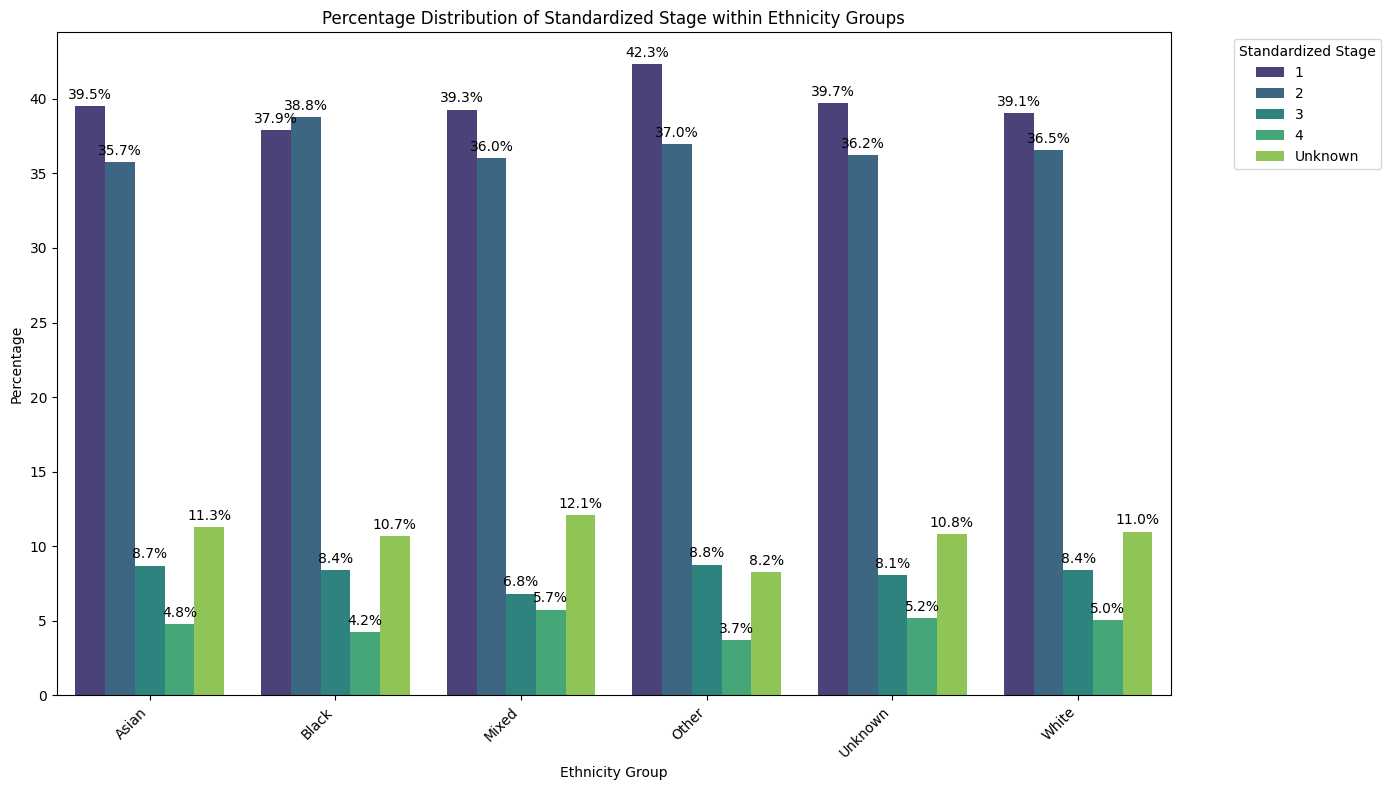

In [89]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a contingency table between STAGE_STANDARDIZED and ETHNICITY_GROUP
contingency_table_stage_ethnicity = pd.crosstab(patient_c50['STAGE_STANDARDIZED'], patient_c50['ETHNICITY_GROUP'])

# Perform the chi-squared test
chi2_stage_ethnicity, p_stage_ethnicity, dof_stage_ethnicity, expected_stage_ethnicity = chi2_contingency(contingency_table_stage_ethnicity)

print("Contingency Table (Standardized Stage vs Ethnicity Group):")
display(contingency_table_stage_ethnicity)
print(f"\nChi-squared statistic: {chi2_stage_ethnicity}")
print(f"P-value: {p_stage_ethnicity}")

# Calculate percentages within each ethnicity group
contingency_table_percentage = contingency_table_stage_ethnicity.div(contingency_table_stage_ethnicity.sum(axis=0), axis=1) * 100

# Prepare data for seaborn barplot
df_percentage = contingency_table_percentage.T.reset_index()
df_percentage = df_percentage.melt(id_vars='ETHNICITY_GROUP', var_name='Standardized Stage', value_name='Percentage')

plt.figure(figsize=(14, 8)) # Increased figure size for better readability
ax = sns.barplot(x='ETHNICITY_GROUP', y='Percentage', hue='Standardized Stage', data=df_percentage, palette='viridis', width=0.8) # Adjusted width

plt.title('Percentage Distribution of Standardized Stage within Ethnicity Groups')
plt.xlabel('Ethnicity Group')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Standardized Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)

plt.show()

Contingency Table (Standardized Stage vs Gender):


GENDER,1,2
STAGE_STANDARDIZED,,
1,2273,107750
2,1585,101203
3,340,23173
4,465,13646
Unknown,1066,29774



Chi-squared statistic: 591.2754148168289
P-value: 1.1978471005819673e-126


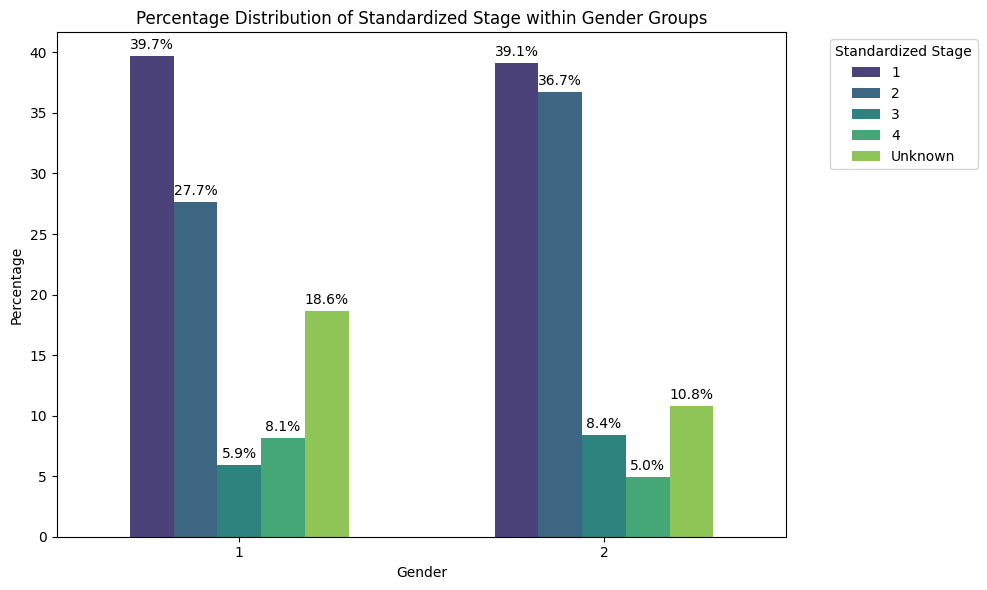

In [90]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a contingency table between STAGE_STANDARDIZED and GENDER
contingency_table_stage_gender = pd.crosstab(patient_c50['STAGE_STANDARDIZED'], patient_c50['GENDER'])

# Perform the chi-squared test
chi2_stage_gender, p_stage_gender, dof_stage_gender, expected_stage_gender = chi2_contingency(contingency_table_stage_gender)

print("Contingency Table (Standardized Stage vs Gender):")
display(contingency_table_stage_gender)
print(f"\nChi-squared statistic: {chi2_stage_gender}")
print(f"P-value: {p_stage_gender}")

# Calculate percentages within each gender group
contingency_table_percentage = contingency_table_stage_gender.div(contingency_table_stage_gender.sum(axis=0), axis=1) * 100

# Prepare data for seaborn barplot
df_percentage = contingency_table_percentage.T.reset_index()
df_percentage = df_percentage.melt(id_vars='GENDER', var_name='Standardized Stage', value_name='Percentage')

plt.figure(figsize=(10, 6)) # Adjusted figure size for better readability
ax = sns.barplot(x='GENDER', y='Percentage', hue='Standardized Stage', data=df_percentage, palette='viridis', width=0.6) # Adjusted width

plt.title('Percentage Distribution of Standardized Stage within Gender Groups')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Standardized Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=3)

plt.show()